In [1]:
import bgshr
import numpy as np
import demes, demesdraw

In [2]:
import matplotlib, matplotlib.pylab as plt

plt.rcParams["legend.title_fontsize"] = "xx-small"
matplotlib.rc("xtick", labelsize=7)
matplotlib.rc("ytick", labelsize=7)
matplotlib.rc("axes", labelsize=8)
matplotlib.rc("axes", titlesize=8)
matplotlib.rc("legend", fontsize=6)
plt.rcParams['legend.title_fontsize'] = 'xx-small'

A few different s values (s=-0.2, -0.05, -0.01?), different r (r=0, r=0.0001?), and a fluctuating size history.

In [3]:
Ns = [1e3, 1e4, 1e3, 1e4, 1e3, 1e4]
Ts = [0, 5e3, 1e4, 1.5e4, 2e4, 2.5e4]

In [4]:
s = -0.5
u = 1e-3
r = 1e-2
r_near = 1e-6
r_far = 1e-2
bgshr.ClassicBGS.reduction_CBGS_n_epoch(Ns, Ts, s, u, r)

0.9975347889827785

In [5]:
gens = np.linspace(0, 3e4, 1001)
Ns2, Ts2 = bgshr.ClassicBGS._shift_Ns_Ts(Ns, Ts, gens[1])

In [6]:
b = demes.Builder()
epochs = [dict(end_time=t, start_size=n) for t, n in zip(Ts[::-1], Ns[::-1])]
b.add_deme("Population", epochs=epochs)
g = b.resolve()

Text(0, 0.5, 'Deme size')

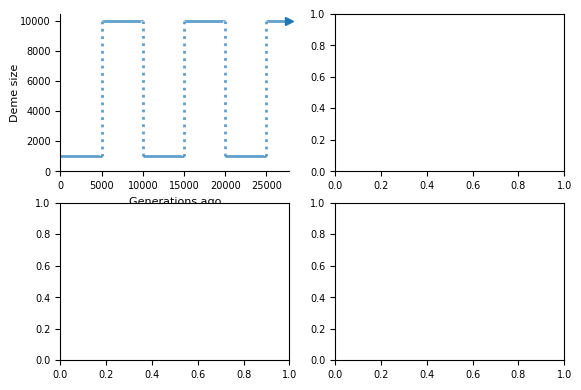

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(6.5, 4.5))
ax1 = axes[0, 0]
demesdraw.size_history(g, ax=ax1)
ax1.set_xlabel("Generations ago")
ax1.set_ylabel("Deme size", rotation=90, labelpad=0)

In [8]:
ax2 = axes[0, 1]
ax2.clear()
s = -0.2
Bs_near = []
Bs_far = []
for gen in gens:
    Ns2, Ts2 = bgshr.ClassicBGS._shift_Ns_Ts(Ns, Ts, gen)
    Bs_near.append(bgshr.ClassicBGS.reduction_CBGS_n_epoch(Ns2, Ts2, s, u, r_near))
    Bs_far.append(bgshr.ClassicBGS.reduction_CBGS_n_epoch(Ns2, Ts2, s, u, r_far))

ax2.plot([0, gens[-1]], [Bs_near[-1], Bs_near[-1]], "--", alpha=0.5)
ax2.plot([0, gens[-1]], [Bs_far[-1], Bs_far[-1]], "--", alpha=0.5)
ax2.set_prop_cycle(None)
ax2.plot(gens, Bs_near, label=f"r={r_near}")
ax2.plot(gens, Bs_far, label=f"r={r_far}")
ax2.set_xlabel("Generations ago")
ax2.set_ylabel("Diversity reduction")
ax2.set_title(f"s={s}")
ax2.legend()

In [9]:
Ns2, Ts2

([10000.0], [0])

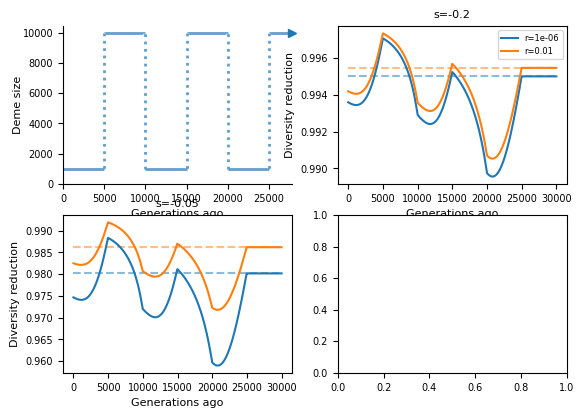

In [10]:
ax3 = axes[1, 0]
ax3.clear()
s = -0.05
Bs_near = []
Bs_far = []
for gen in gens:
    Ns2, Ts2 = bgshr.ClassicBGS._shift_Ns_Ts(Ns, Ts, gen)
    Bs_near.append(bgshr.ClassicBGS.reduction_CBGS_n_epoch(Ns2, Ts2, s, u, r_near))
    Bs_far.append(bgshr.ClassicBGS.reduction_CBGS_n_epoch(Ns2, Ts2, s, u, r_far))

ax3.plot([0, gens[-1]], [Bs_near[-1], Bs_near[-1]], "--", alpha=0.5)
ax3.plot([0, gens[-1]], [Bs_far[-1], Bs_far[-1]], "--", alpha=0.5)
ax3.set_prop_cycle(None)
ax3.plot(gens, Bs_near, label=f"r={r_near}")
ax3.plot(gens, Bs_far, label=f"r={r_far}")
ax3.set_xlabel("Generations ago")
ax3.set_ylabel("Diversity reduction")
ax3.set_title(f"s={s}")
fig

In [11]:
ax4 = axes[1, 1]
ax4.clear()
s = -0.01
Bs_near = []
Bs_far = []
for gen in gens:
    Ns2, Ts2 = bgshr.ClassicBGS._shift_Ns_Ts(Ns, Ts, gen)
    Bs_near.append(bgshr.ClassicBGS.reduction_CBGS_n_epoch(Ns2, Ts2, s, u, r_near))
    Bs_far.append(bgshr.ClassicBGS.reduction_CBGS_n_epoch(Ns2, Ts2, s, u, r_far))

ax4.plot([0, gens[-1]], [Bs_near[-1], Bs_near[-1]], "--", alpha=0.5)
ax4.plot([0, gens[-1]], [Bs_far[-1], Bs_far[-1]], "--", alpha=0.5)
ax4.set_prop_cycle(None)
ax4.plot(gens, Bs_near, label=f"r={r_near}")
ax4.plot(gens, Bs_far, label=f"r={r_far}")
ax4.set_xlabel("Generations ago")
ax4.set_ylabel("Diversity reduction")
ax4.set_title(f"s={s}")

Text(0.5, 1.0, 's=-0.01')

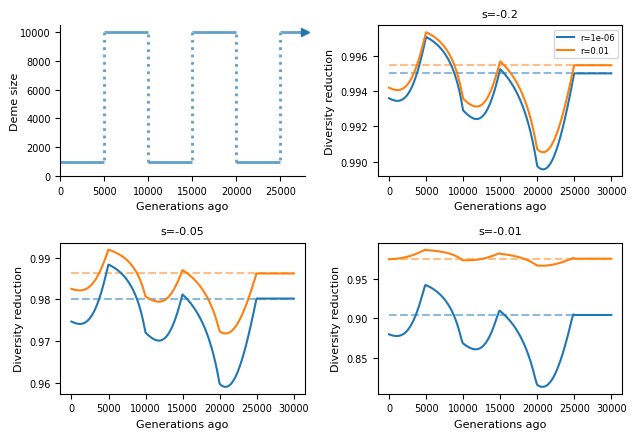

In [12]:
fig.tight_layout()
fig

In [13]:
fig.savefig("cBGS_dynamics.pdf")